# Alex Barkovitch 
## CMP 262 Final Project: Video Game Data Analysis

### Data Source:  https://www.kaggle.com/datasets/jummyegg/rawg-game-dataset/data
#### Column Definitions:
##### id: An unique ID identifying this Game in RAWG Database
##### slug: An unique slug identifying this Game in RAWG Database
##### name: Name of the game
##### metacritic: Rating of the game on Metacritic
##### released: The date the game was released
##### tba: To be announced state
##### updated: The date the game was last updated
##### website: Game Website
##### rating: Rating rated by RAWG user
##### rating_top: Maximum rating
##### playtime: Hours needed to complete the game
##### achievements_count: Number of achievements in game
##### ratings_count: Number of RAWG users who rated the game
##### suggestions_count: Number of RAWG users who suggested the game
##### game_series_count: Number of games in the series
##### reviews_count: Number of RAWG users who reviewed the game
##### platforms: Platforms game was released on. Separated by ||
##### developers: Game developers. Separated by ||
##### genres: Game genres. Separated by ||
##### publishers: Game publishers. Separated by ||
##### esrb_rating: ESRB ratings
##### added_status_yet: Number of RAWG users had the game as "Not played"
##### added_status_owned: Number of RAWG users had the game as "Owned"
##### added_status_beaten: Number of RAWG users had the game as "Completed"
##### added_status_toplay: Number of RAWG users had the game as "To play"
##### added_status_dropped: Number of RAWG users had the game as "Played but not beaten"
##### added_status_playing: Number of RAWG users had the game as "Playing"

## Questions I will ask about the dataset:
### Which genres have the highest ratings?
### Which platforms have the highest ratings?
### Which ESRB ratings have the highest rated games?
### Which games have the most recommendations?
### How do the metacritic ratings compare to the RAWG ratings?
### How many players have completed or dropped each game?

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data file and save it into a pandas dataframe
datafile = "game_info.csv"
df = pd.read_csv(datafile, index_col=0)

In [3]:
# display the dataset
df

,slug,name,metacritic,released,tba,updated,website,rating,rating_top,playtime,...,developers,genres,publishers,esrb_rating,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing
id,,,,,,,,,,,,,,,,,,,,,
1,dgeneration-hd,D/Generation HD,NaN,2015-10-23,False,2019-09-17T11:58:57,http://dgeneration.net,0.0,0,1,...,West Coast Software,Adventure||Puzzle,West Coast Software,Everyone 10+,4,88,2,2,0,0
10,g-prime,G Prime Into The Rain,NaN,2016-01-06,False,2019-11-06T23:04:19,NaN,0.0,0,0,...,Soma Games,Simulation||Indie,Immanitas Entertainment||Code-Monkeys,Everyone,2,42,2,0,0,0
100,land-sliders,Land Sliders,NaN,2015-09-24,False,2019-10-22T13:56:16,http://prettygreat.com,0.0,0,0,...,Prettygreat Pty,Adventure||Arcade,Prettygreat Pty,Everyone 10+,0,2,2,0,1,0
1000,pixel-gear,Pixel Gear,NaN,2016-10-20,False,2019-08-28T22:16:02,https://www.facebook.com/Geronimo-Interactive-...,0.0,0,0,...,Oasis Games||Geronimo Interactive,Action||Indie,Geronimo Interactive,Teen,0,1,0,0,0,0
10000,gods-and-idols,Gods and Idols,NaN,2016-12-12,False,2019-09-17T13:37:13,http://www.godsandidols.com/,0.0,1,1,...,Viking Tao,RPG||Strategy||Massively Multiplayer,Viking Tao,NaN,2,79,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,holy-or-dead,Holy or Dead,NaN,2017-05-17,False,2019-01-09T12:41:06,NaN,0.0,0,0,...,Ralidon,NaN,NaN,NaN,0,0,0,0,0,0
99995,airstrike-hd-demo,Airstrike HD Demo,NaN,2016-03-04,False,2019-01-09T12:41:06,NaN,0.0,0,0,...,Fifth Dimension Company,Action,NaN,NaN,0,0,0,0,0,0
99997,uranias-mirror,Urania's Mirror,NaN,2016-04-25,False,2019-01-09T12:41:06,NaN,0.0,0,0,...,sneakthief,Adventure,NaN,NaN,0,0,0,0,0,0


## Let's start by exploring the dataset using describe, columns, shape, dtypes, head, tail, sample, and info

In [4]:
# describe numeric columns
df.describe() 

,metacritic,rating,rating_top,playtime,achievements_count,ratings_count,suggestions_count,game_series_count,reviews_count,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing
count,4733.000000,474417.000000,474417.000000,474417.000000,474417.000000,474417.000000,474417.000000,474417.000000,474417.000000,474417.000000,474417.000000,474417.000000,474417.000000,474417.000000,474417.000000
mean,73.159307,0.085723,0.098829,0.221662,4.448837,2.142463,92.196848,0.044282,2.162783,0.685030,11.251418,1.361486,0.430767,0.678100,0.149027
std,11.502213,0.545049,0.613023,5.399684,117.671466,36.553606,116.493695,0.771472,36.868160,9.012424,128.531595,28.519725,8.970948,10.484977,3.911149
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,99.000000,5.000000,5.000000,1600.000000,12322.000000,4289.000000,1839.000000,28.000000,4334.000000,635.000000,8298.000000,3533.000000,2325.000000,1092.000000,644.000000


In [5]:
# display all column headers
df.columns

Index(['slug', 'name', 'metacritic', 'released', 'tba', 'updated', 'website',
       'rating', 'rating_top', 'playtime', 'achievements_count',
       'ratings_count', 'suggestions_count', 'game_series_count',
       'reviews_count', 'platforms', 'developers', 'genres', 'publishers',
       'esrb_rating', 'added_status_yet', 'added_status_owned',
       'added_status_beaten', 'added_status_toplay', 'added_status_dropped',
       'added_status_playing'],
      dtype='object')

In [6]:
# displays number of rows and columns
df.shape

(474417, 26)

In [7]:
# display the data type of each column
df.dtypes

slug                     object
name                     object
metacritic              float64
released                 object
tba                        bool
updated                  object
website                  object
rating                  float64
rating_top                int64
playtime                  int64
achievements_count        int64
ratings_count             int64
suggestions_count         int64
game_series_count         int64
reviews_count             int64
platforms                object
developers               object
genres                   object
publishers               object
esrb_rating              object
added_status_yet          int64
added_status_owned        int64
added_status_beaten       int64
added_status_toplay       int64
added_status_dropped      int64
added_status_playing      int64
dtype: object

In [8]:
# display the first 5 rows of the dataset
df.head()

,slug,name,metacritic,released,tba,updated,website,rating,rating_top,playtime,...,developers,genres,publishers,esrb_rating,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing
id,,,,,,,,,,,,,,,,,,,,,
1,dgeneration-hd,D/Generation HD,NaN,2015-10-23,False,2019-09-17T11:58:57,http://dgeneration.net,0.0,0,1,...,West Coast Software,Adventure||Puzzle,West Coast Software,Everyone 10+,4,88,2,2,0,0
10,g-prime,G Prime Into The Rain,NaN,2016-01-06,False,2019-11-06T23:04:19,NaN,0.0,0,0,...,Soma Games,Simulation||Indie,Immanitas Entertainment||Code-Monkeys,Everyone,2,42,2,0,0,0
100,land-sliders,Land Sliders,NaN,2015-09-24,False,2019-10-22T13:56:16,http://prettygreat.com,0.0,0,0,...,Prettygreat Pty,Adventure||Arcade,Prettygreat Pty,Everyone 10+,0,2,2,0,1,0
1000,pixel-gear,Pixel Gear,NaN,2016-10-20,False,2019-08-28T22:16:02,https://www.facebook.com/Geronimo-Interactive-...,0.0,0,0,...,Oasis Games||Geronimo Interactive,Action||Indie,Geronimo Interactive,Teen,0,1,0,0,0,0
10000,gods-and-idols,Gods and Idols,NaN,2016-12-12,False,2019-09-17T13:37:13,http://www.godsandidols.com/,0.0,1,1,...,Viking Tao,RPG||Strategy||Massively Multiplayer,Viking Tao,NaN,2,79,0,0,0,0


In [9]:
# display the last 5 rows of the dataset
df.tail()

,slug,name,metacritic,released,tba,updated,website,rating,rating_top,playtime,...,developers,genres,publishers,esrb_rating,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing
id,,,,,,,,,,,,,,,,,,,,,
99994,holy-or-dead,Holy or Dead,NaN,2017-05-17,False,2019-01-09T12:41:06,NaN,0.0,0,0,...,Ralidon,NaN,NaN,NaN,0,0,0,0,0,0
99995,airstrike-hd-demo,Airstrike HD Demo,NaN,2016-03-04,False,2019-01-09T12:41:06,NaN,0.0,0,0,...,Fifth Dimension Company,Action,NaN,NaN,0,0,0,0,0,0
99997,uranias-mirror,Urania's Mirror,NaN,2016-04-25,False,2019-01-09T12:41:06,NaN,0.0,0,0,...,sneakthief,Adventure,NaN,NaN,0,0,0,0,0,0
99998,simucities,Simucities,NaN,2017-05-26,False,2019-01-09T12:41:06,NaN,0.0,0,0,...,keypixels,NaN,NaN,NaN,0,0,0,0,0,0
99999,pocket-assault,Pocket Assault (itch),NaN,2015-08-20,False,2019-01-09T12:41:06,NaN,0.0,0,0,...,Carsten_Ostermann,Shooter,NaN,NaN,0,0,0,0,0,0


In [10]:
# display a random row from the dataset as a sample of the data
df.sample()

,slug,name,metacritic,released,tba,updated,website,rating,rating_top,playtime,...,developers,genres,publishers,esrb_rating,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing
id,,,,,,,,,,,,,,,,,,,,,
74698,jellipop-match,Jellipop Match,NaN,2016-10-04,False,2019-10-25T03:38:15,NaN,0.0,0,0,...,Microfun,Family||Puzzle,Microfun,Everyone 10+,0,1,0,0,2,0


In [11]:
# display number of columns, column names, data types, number of non-null values in the column, number of data types, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 474417 entries, 1 to 99999
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   slug                  474415 non-null  object 
 1   name                  474414 non-null  object 
 2   metacritic            4733 non-null    float64
 3   released              450218 non-null  object 
 4   tba                   474417 non-null  bool   
 5   updated               474417 non-null  object 
 6   website               65041 non-null   object 
 7   rating                474417 non-null  float64
 8   rating_top            474417 non-null  int64  
 9   playtime              474417 non-null  int64  
 10  achievements_count    474417 non-null  int64  
 11  ratings_count         474417 non-null  int64  
 12  suggestions_count     474417 non-null  int64  
 13  game_series_count     474417 non-null  int64  
 14  reviews_count         474417 non-null  int64  
 15  platfo

# Now it's time to clean the data
### Drop any columns we don't need for analysis. Start by checking the values for the TBA column. We don't need games that are still to be announced in our dataset, so we can drop any rows for games where TBA is true. After removing those rows, we can drop the column, as the whole column is now false. 

In [12]:
# check the value counts for 'tba' column
tba_result = df.tba.value_counts()
tba_result

tba
False    472076
True       2341
Name: count, dtype: int64

In [13]:
# drop any rows where 'tba' is true
df.drop(df.loc[df['tba']==True].index, inplace=True)

In [14]:
# check new tba value counts
new_tba = df.tba.value_counts()
new_tba

tba
False    472076
Name: count, dtype: int64

### With the true TBA rows gone, we can begin dropping columns. We no longer need TBA, slug, website, or the play status for not played, owned, beaten, to play, and playing columns.

In [15]:
# drop the columns we don't need
df.drop(columns=['slug', 'website', 'tba', 'added_status_yet','added_status_owned', 'added_status_toplay', 'added_status_playing'], inplace = True)

### We want to drop rows with a rating count less than 100, because a higher number of ratings makes the rating value more reliable. Removing games with less ratings is a good way to make the dataset smaller because 474k rows is too big for a chart. Well known games are more likely to have a higher rating count than the lesser-known games, so if we're going to shrink our dataset, it is better to remove the games with a lower rating count.

In [16]:
# check the value counts for ratings
ratings = df.ratings_count.value_counts()
ratings

ratings_count
0       435751
1        13765
2         4912
3         2727
4         1816
         ...  
726          1
775          1
2526         1
2424         1
1244         1
Name: count, Length: 789, dtype: int64

In [17]:
# drop rows that have less than 100 ratings to make rating values more accurate
df.drop(df.loc[df['ratings_count']<100].index, inplace=True)

In [18]:
# you can see that there are no more rows with a ratings count of zero
new_ratings = df.ratings_count.value_counts()
new_ratings

ratings_count
108     22
113     20
104     16
101     16
106     15
        ..
398      1
726      1
775      1
2526     1
1244     1
Name: count, Length: 689, dtype: int64

### Now it's time to clean the null data, either by dropping or replacing. We don't want any games without a name in our dataset so those will be dropped, but for the rest of the objects in our dataframe, we want to fill null values with 'N/A'. Don't replace/drop null numeric values as we don't want them to effect the data during analysis.

In [19]:
# drop any rows where 'name' is null
df = df.dropna(subset=['name'])

In [20]:
# check new null count
name_nan = df['ratings_count'].isna().sum()
name_nan

0

In [21]:
# check new info so we can fill null values for required columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1883 entries, 10001 to 9997
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1883 non-null   object 
 1   metacritic            1442 non-null   float64
 2   released              1881 non-null   object 
 3   updated               1883 non-null   object 
 4   rating                1883 non-null   float64
 5   rating_top            1883 non-null   int64  
 6   playtime              1883 non-null   int64  
 7   achievements_count    1883 non-null   int64  
 8   ratings_count         1883 non-null   int64  
 9   suggestions_count     1883 non-null   int64  
 10  game_series_count     1883 non-null   int64  
 11  reviews_count         1883 non-null   int64  
 12  platforms             1883 non-null   object 
 13  developers            1843 non-null   object 
 14  genres                1872 non-null   object 
 15  publishers            

In [22]:
# loop through columns to check datatype of column and fillna for objects only
for col in df:
    # get data type for each column
    dt = df[col].dtype 
    # if the datatype is an object, use fillna to replace null values with 'N/A'
    if dt == object:
        df[col] = df[col].fillna('N/A')

In [23]:
# check the value counts for esrb rating
esrb = df.esrb_rating.value_counts()
esrb

esrb_rating
N/A               741
Mature            441
Teen              361
Everyone 10+      176
Everyone          105
Adults Only        54
Rating Pending      5
Name: count, dtype: int64

### We need to remove any rows with non-ascii characters in the video game title, because we don't have the fonts needed to create a plot with those characters.

In [24]:
# remove any rows with non-ascii characters in the name column
df = df[df['name'].map(lambda x: x.isascii())]

In [25]:
# check the info for our cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1842 entries, 10001 to 9997
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1842 non-null   object 
 1   metacritic            1413 non-null   float64
 2   released              1842 non-null   object 
 3   updated               1842 non-null   object 
 4   rating                1842 non-null   float64
 5   rating_top            1842 non-null   int64  
 6   playtime              1842 non-null   int64  
 7   achievements_count    1842 non-null   int64  
 8   ratings_count         1842 non-null   int64  
 9   suggestions_count     1842 non-null   int64  
 10  game_series_count     1842 non-null   int64  
 11  reviews_count         1842 non-null   int64  
 12  platforms             1842 non-null   object 
 13  developers            1842 non-null   object 
 14  genres                1842 non-null   object 
 15  publishers            

### Save the cleaned data to a new csv file

In [26]:
# save to csv
#df.to_csv("cleaned_game_info.csv")

# Now that the data is clean, it's time to analyze the data to answer some of our questions.
# Question 1: What genres have the highest average ratings?
## To look at the ratings for genres, we'll start by creating a new dataframe with 'genres' and 'rating' columns. For games with more than one genre, we need to split the genres into substrings and then give each genre it's own row. Then we can plot the rating data for each genre.

In [27]:
# create genre_ratings dataframe with genres and rating columns
genre_ratings = df[['genres','rating']]
genre_ratings

,genres,rating
id,,
10001,Action||Indie,3.07
10023,Action||RPG||Indie,2.20
10028,Action||Strategy||Simulation||Indie,3.54
10031,Action,3.24
10035,Action||Shooter,3.92
...,...,...
9976,Action||Simulation||Massively Multiplayer,2.83
9979,Action||Shooter,2.79
998,Action||Shooter||Massively Multiplayer,3.80


In [28]:
# convert the column to string type
genre_ratings['genres'] = genre_ratings['genres'].astype(str)
# replace '||' with '|', then split the genres into a list of substrings based on '|' delimiter 
genre_ratings['genres'] = genre_ratings['genres'].str.replace('||', '|').str.split('|')
genre_ratings

C:\Users\alexb\AppData\Local\Temp\ipykernel_4368\1663366201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_ratings['genres'] = genre_ratings['genres'].astype(str)
C:\Users\alexb\AppData\Local\Temp\ipykernel_4368\1663366201.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_ratings['genres'] = genre_ratings['genres'].str.replace('||', '|').str.split('|')


,genres,rating
id,,
10001,"[Action, Indie]",3.07
10023,"[Action, RPG, Indie]",2.20
10028,"[Action, Strategy, Simulation, Indie]",3.54
10031,[Action],3.24
10035,"[Action, Shooter]",3.92
...,...,...
9976,"[Action, Simulation, Massively Multiplayer]",2.83
9979,"[Action, Shooter]",2.79
998,"[Action, Shooter, Massively Multiplayer]",3.80


In [29]:
# explode will convert each substring into it's own row
genre_ratings = genre_ratings.explode('genres')
genre_ratings

,genres,rating
id,,
10001,Action,3.07
10001,Indie,3.07
10023,Action,2.20
10023,RPG,2.20
10023,Indie,2.20
...,...,...
9981,Strategy,4.30
9997,Action,3.84
9997,Shooter,3.84


### Sort the dataframe in order of descending rating values for our plot.

In [30]:
# sort the genres in order of descending rating
genre_ratings = genre_ratings.sort_values(by='rating', ascending=False)
genre_ratings

,genres,rating
id,,
339958,RPG,4.81
339958,Adventure,4.81
257255,Adventure,4.77
257255,RPG,4.77
4167,RPG,4.76
...,...,...
16183,Racing,2.03
16183,Simulation,2.03
17004,Adventure,1.96


### Remove rows where genre is N/A. These were originally null values that we filled, and aren't relevant to our analysis.

In [79]:
# remove the rows for the N/A genre
genre_ratings = genre_ratings[genre_ratings['genres'] != 'N/A']
genre_ratings

,genres,rating
id,,
339958,RPG,4.81
339958,Adventure,4.81
257255,Adventure,4.77
257255,RPG,4.77
4167,RPG,4.76
...,...,...
16183,Racing,2.03
16183,Simulation,2.03
17004,Adventure,1.96


## Use a boxplot to chart the rating value distrubution for each genre. Compare plots sorted by median rating value and sorted by max rating value.

In [32]:
# for plot sorted by median
# get the median values for each platforms rating
median_ratings = genre_ratings.groupby('genres')['rating'].median().sort_values(ascending=False)
# sort the dataframe by the median
genre_ratings_sorted = genre_ratings.set_index('genres').loc[median_ratings.index]

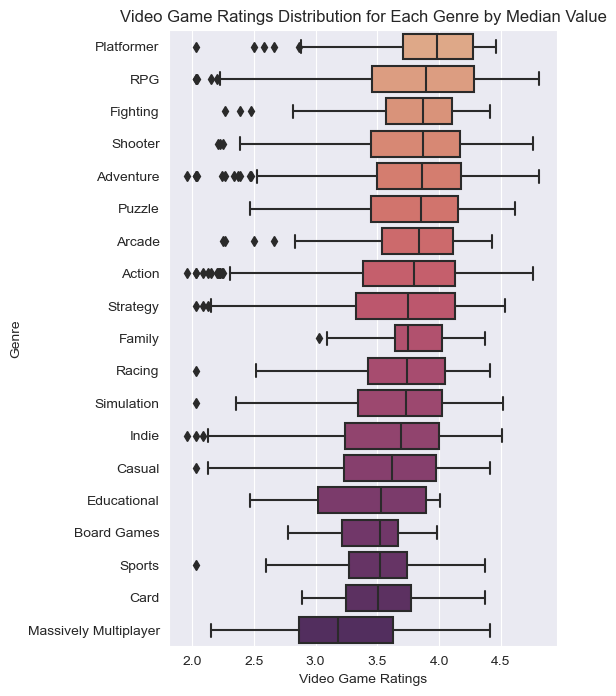

In [86]:
# set figure size and style
plt.figure(figsize=(5, 8))
sns.set_style('darkgrid')
# chart the median sorted data using a boxplot
sns.boxplot(data=genre_ratings_sorted, x='rating', y=genre_ratings_sorted.index, palette='flare')

# Set labels and title
plt.title('Video Game Ratings Distribution for Each Genre by Median Value')
plt.xlabel('Video Game Ratings')
plt.ylabel('Genre')

# save plot to svg file
plt.savefig('genre_ratings_median.svg', format='svg', bbox_inches='tight')

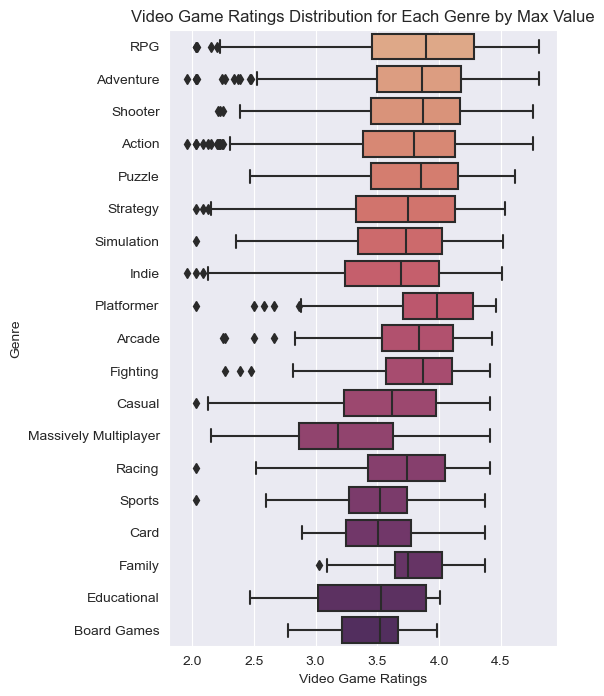

In [87]:
# set figure size and style
plt.figure(figsize=(5, 8))
sns.set_style('darkgrid')

# chart data sorted by max rating using a boxplot
sns.boxplot(data= genre_ratings, x='rating', y='genres', palette='flare')

# set title and labels
plt.title('Video Game Ratings Distribution for Each Genre by Max Value')
plt.xlabel('Video Game Ratings')
plt.ylabel('Genre')

# save plot to svg file
plt.savefig('genre_ratings_max.svg', format='svg', bbox_inches='tight')

## Conclusions: When looking at these results, I think it's safe to say that RPG is the most popular video game genre. Platformers also see a lot of success, so I would suggest either of these genres to developers. Board games and massively multiplayer aren't nearly as popular, and are likely genres that developers shouldn't pursue.
##
# Question 2: Which platforms have the highest rated games?
## To answer this question, we'll pull the platforms and rating columns into a new dataframe. We'll need to split the platforms in the column and then give each their own new row to graph the ratings for each platform. 

In [35]:
# create platform_ratings with platforms and rating columns
platform_ratings = df[['platforms','rating']]
platform_ratings

,platforms,rating
id,,
10001,Linux||macOS||PC,3.07
10023,Linux||PC,2.20
10028,PC||Xbox One,3.54
10031,PC,3.24
10035,Linux||macOS||PC||Xbox One||PlayStation 4,3.92
...,...,...
9976,Linux||PC||macOS,2.83
9979,PC,2.79
998,PC||PlayStation 4||Xbox One,3.80


In [36]:
# convert the column to string type
platform_ratings['platforms'] = platform_ratings['platforms'].astype(str)
# replace '||' with '|', then split the genres into a list of substrings based on '|' delimiter 
platform_ratings['platforms'] = platform_ratings['platforms'].str.replace('||', '|').str.split('|')
platform_ratings

C:\Users\alexb\AppData\Local\Temp\ipykernel_4368\1824735047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platform_ratings['platforms'] = platform_ratings['platforms'].astype(str)
C:\Users\alexb\AppData\Local\Temp\ipykernel_4368\1824735047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platform_ratings['platforms'] = platform_ratings['platforms'].str.replace('||', '|').str.split('|')


,platforms,rating
id,,
10001,"[Linux, macOS, PC]",3.07
10023,"[Linux, PC]",2.20
10028,"[PC, Xbox One]",3.54
10031,[PC],3.24
10035,"[Linux, macOS, PC, Xbox One, PlayStation 4]",3.92
...,...,...
9976,"[Linux, PC, macOS]",2.83
9979,[PC],2.79
998,"[PC, PlayStation 4, Xbox One]",3.80


In [37]:
# explode will convert each substring into it's own row
platform_ratings = platform_ratings.explode('platforms')
platform_ratings

,platforms,rating
id,,
10001,Linux,3.07
10001,macOS,3.07
10001,PC,3.07
10023,Linux,2.20
10023,PC,2.20
...,...,...
998,Xbox One,3.80
9981,PC,4.30
9981,macOS,4.30


### Sort dataframe for our plot and drop rows which aren't relevant to our analysis

In [38]:
# sort the platforms in order of descending rating
platform_ratings = platform_ratings.sort_values(by='rating', ascending=False)
platform_ratings

,platforms,rating
id,,
339958,PlayStation 4,4.81
257255,PC,4.77
257255,Nintendo Switch,4.77
257255,PlayStation 4,4.77
257255,Xbox One,4.77
...,...,...
17004,Nintendo Switch,1.96
17004,Xbox One,1.96
17004,PC,1.96


In [39]:
# remove the row for the N/A platforms, which were originally null values
platform_ratings = platform_ratings[platform_ratings['platforms'] != 'N/A']
platform_ratings

,platforms,rating
id,,
339958,PlayStation 4,4.81
257255,PC,4.77
257255,Nintendo Switch,4.77
257255,PlayStation 4,4.77
257255,Xbox One,4.77
...,...,...
17004,Nintendo Switch,1.96
17004,Xbox One,1.96
17004,PC,1.96


##  Use a boxplot to chart the rating data for each platform. Compare plots sorted by median and sorted by max rating values.

In [40]:
# for plot sorted by median
# get the median values for each platforms rating
median_ratings = platform_ratings.groupby('platforms')['rating'].median().sort_values(ascending=False)

# sort the dataframe by median
platform_ratings_sorted = platform_ratings.set_index('platforms').loc[median_ratings.index]
platform_ratings_sorted

,rating
platforms,
SNES,4.41
SNES,4.41
SNES,4.40
SNES,4.39
SNES,4.38
...,...
Web,3.38
Web,3.35
Web,3.20


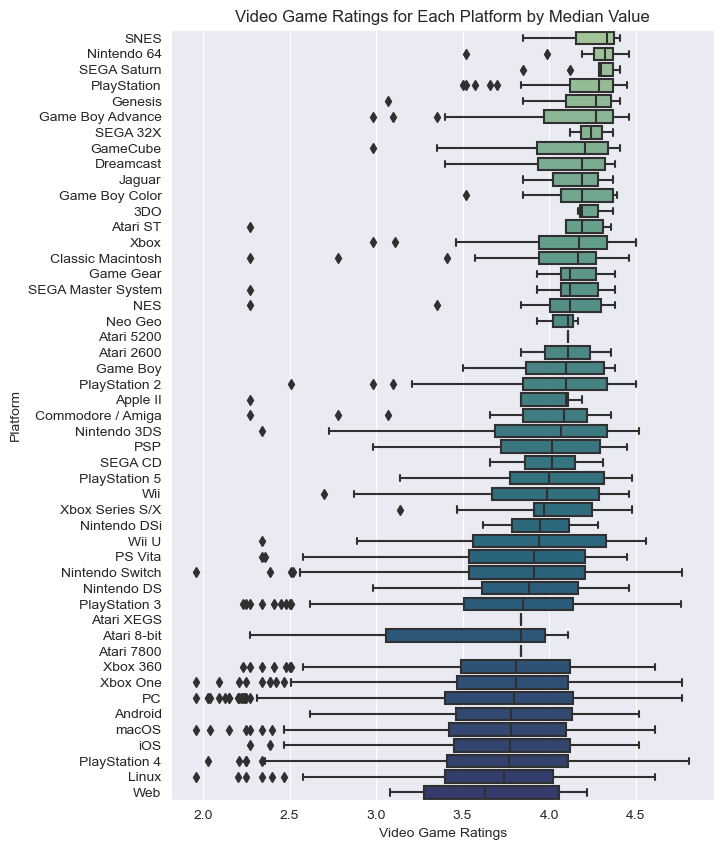

In [82]:
# set figure size and style
plt.figure(figsize=(7, 10))
sns.set_style('darkgrid')
# chart the median sorted data using a boxplot
sns.boxplot(data=platform_ratings_sorted, x='rating', y=platform_ratings_sorted.index, palette='crest')

# set title and labels
plt.title('Video Game Ratings for Each Platform by Median Value')
plt.xlabel('Video Game Ratings')
plt.ylabel('Platform')

# save plot to svg file
plt.savefig('platform_ratings_median.svg', format='svg', bbox_inches='tight')

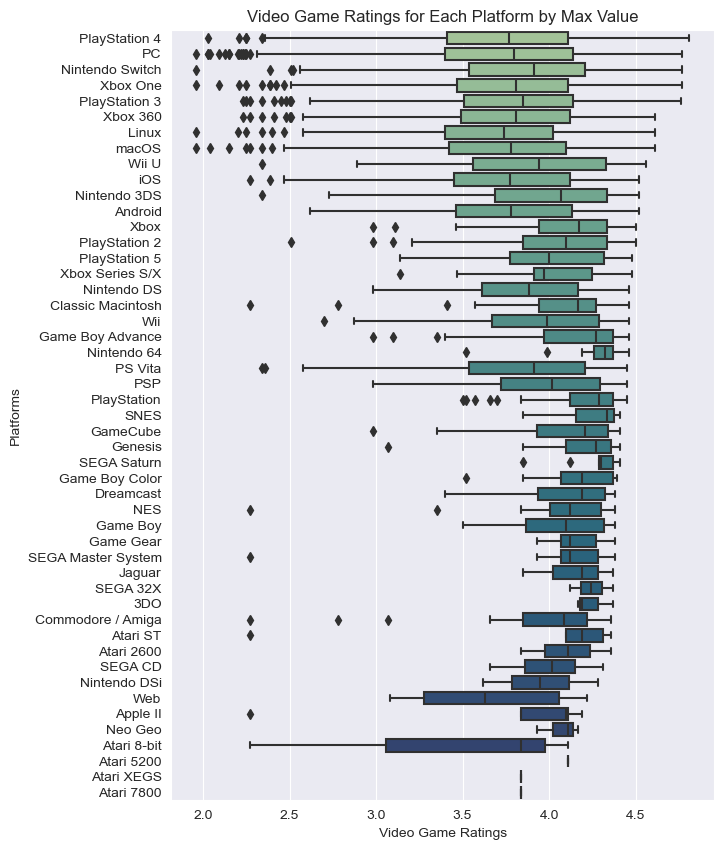

In [83]:
# plot sorted by max rating
# set figure size and style
plt.figure(figsize=(7, 10))
sns.set_style('darkgrid')

# chart the max sorted data using a boxplot
sns.boxplot(data= platform_ratings, x='rating', y='platforms', palette = 'crest')
# set title and labels
plt.title('Video Game Ratings for Each Platform by Max Value')
plt.xlabel('Video Game Ratings')
plt.ylabel('Platforms')

# save plot to svg file
plt.savefig('platform_ratings_max.svg', format='svg', bbox_inches='tight')

## Conclusions: Comparing the max value list to the median value list is very interesting. The platforms with the top median's are very old systems that don't release new games currently. They do have many classic games, so the results aren't actually too surprising. The max values don't surprise me either, PlayStation 4 has a lot of very good games, and so does PC and Switch. I would probably recommend any of these platforms to a developer looking to gain insights from these results. It's tough to recommend a platform to stay away from, as all of the platfoms with the lowest ratings also have the highest ratings, or are no longer a platform releasing new games. If I had to pick one, I think macOS is the least successful current platform.
##

# Question 3: Which ESRB ratings have the highest rated games?
## To answer this question, we'll need to make a new dataframe with the data for name, rating, ratings_count, and esrb_columns. We want to plot the general rating data for ESRB ratings, as well as some top rated games sorted by their ESRB rating. Because there are a lot of games in this dataset, we need ratings_count to drop the games with less ratings to make the graph more clear.

In [94]:
# create a dataframe with name, rating, ratings_count, and esrb_rating columns
esrb_games = df[['name','rating','esrb_rating']]
esrb_games

,name,rating,esrb_rating
id,,,
10001,Serious Sam Fusion 2017 (beta),3.07,N/A
10023,Geneshift,2.20,N/A
10028,Space Engineers,3.54,N/A
10031,Battlerite,3.24,N/A
10035,HITMAN,3.92,Adults Only
...,...,...,...
9976,Star Conflict,2.83,N/A
9979,Dirty Bomb,2.79,N/A
998,Battlefield 1,3.80,N/A


### Remove any rows where the ESRB rating is 'N/A' or 'Rating Pending.' We do not want to include these rows in our plot.

In [95]:
# drop rows that don't have a valid ESRB rating
esrb_games = esrb_games.drop(esrb_games[esrb_games['esrb_rating'].isin(['N/A', 'Rating Pending'])].index)
esrb_games

,name,rating,esrb_rating
id,,,
10035,HITMAN,3.92,Adults Only
10049,Hitman: Codename 47,3.87,Mature
10050,Thief Gold,4.13,Mature
10061,Watch Dogs 2,3.85,Mature
10065,Cities: Skylines,4.15,Everyone
...,...,...,...
9896,Marvel's Guardians of the Galaxy: The Telltale...,3.53,Teen
99,Snake Pass,3.37,Everyone
9911,Dungeon Defenders II,2.94,Everyone 10+


In [96]:
# count the values
esrb_games.esrb_rating.value_counts()

esrb_rating
Mature          432
Teen            356
Everyone 10+    174
Everyone         97
Adults Only      54
Name: count, dtype: int64

### We want to sort the dataframe by game rating within each ESRB rating. The order of the ESRB ratings are Everyone, Everyone 10+, Teen, Mature, and Adult Only. We're going to group these rows together, and then sort the ratings within each group in descending order for better graph clarity.

In [97]:
# group and sort the dataframe by ESRB rating from everyone to adults only
esrb_order = ['Everyone', 'Everyone 10+', 'Teen', 'Mature', 'Adults Only']
# convert the ESRB rating column to categorical data sorted by esrb_order
esrb_games['esrb_rating'] = pd.Categorical(esrb_games['esrb_rating'], categories=esrb_order, ordered=True)
# sort the dataframe first by ESRB rating and then by rating
esrb_games = esrb_games.sort_values(by=['esrb_rating', 'rating'])
esrb_games

,name,rating,esrb_rating
id,,,
28564,Hexic HD,2.60,Everyone
23302,Black Squad,2.63,Everyone
8923,Faeria,2.97,Everyone
779,ROBLOX,3.03,Everyone
28179,SEGA Mega Drive and Genesis Classics,3.06,Everyone
...,...,...,...
17857,S.T.A.L.K.E.R.: Shadow of Chernobyl,4.31,Adults Only
58862,P.T.,4.33,Adults Only
19397,Vampire: The Masquerade - Bloodlines,4.35,Adults Only


## Now it's time to plot the data. Create a boxplot to see the rating data for each ESRB rating, and a bar graph sorted by ESRB ratings and game ratings so we can see the most popular games for each ESRB rating.

C:\Users\alexb\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


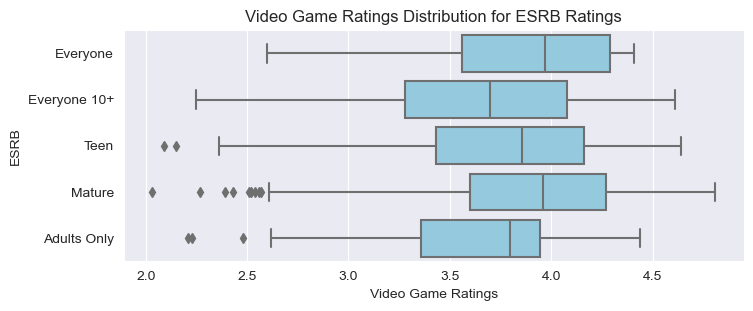

In [114]:
# set figure size and style
plt.figure(figsize=(8, 3))
sns.set_style('darkgrid')
# chart esrb_games data using a boxplot
sns.boxplot(data= esrb_games, x="rating", y="esrb_rating", color = 'skyblue')
# set title and labels
plt.title('Video Game Ratings Distribution for ESRB Ratings')
plt.xlabel('Video Game Ratings')
plt.ylabel('ESRB')

# save plot to svg file
plt.savefig('ESRB_ratings.svg', format='svg', bbox_inches='tight')

### Get the top 10 rated games in each ESRB rating. Group ESRB ratings together, and get the 10 largest rating values for our chart.

In [99]:
# check value counts
esrb_games.esrb_rating.value_counts()

esrb_rating
Mature          432
Teen            356
Everyone 10+    174
Everyone         97
Adults Only      54
Name: count, dtype: int64

In [100]:
# get the top 5 rated games for each ESRB rating
top_esrb = esrb_games.groupby('esrb_rating').apply(lambda x: x.nlargest(5, 'rating')).reset_index(drop=True)
top_esrb

C:\Users\alexb\AppData\Local\Temp\ipykernel_4368\1203927060.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_esrb = esrb_games.groupby('esrb_rating').apply(lambda x: x.nlargest(5, 'rating')).reset_index(drop=True)


,name,rating,esrb_rating
0,Metroid: Zero Mission,4.41,Everyone
1,Monument Valley,4.41,Everyone
2,Mario Kart 8 Deluxe,4.40,Everyone
3,Super Metroid,4.40,Everyone
4,The Legend of Zelda: Ocarina of Time,4.39,Everyone
5,Portal 2,4.61,Everyone 10+
6,The Legend of Zelda: Breath of the Wild,4.56,Everyone 10+
7,The Legend of Zelda: Ocarina of Time 3D,4.48,Everyone 10+
8,Super Mario Odyssey,4.43,Everyone 10+
9,Kingdom Hearts,4.40,Everyone 10+


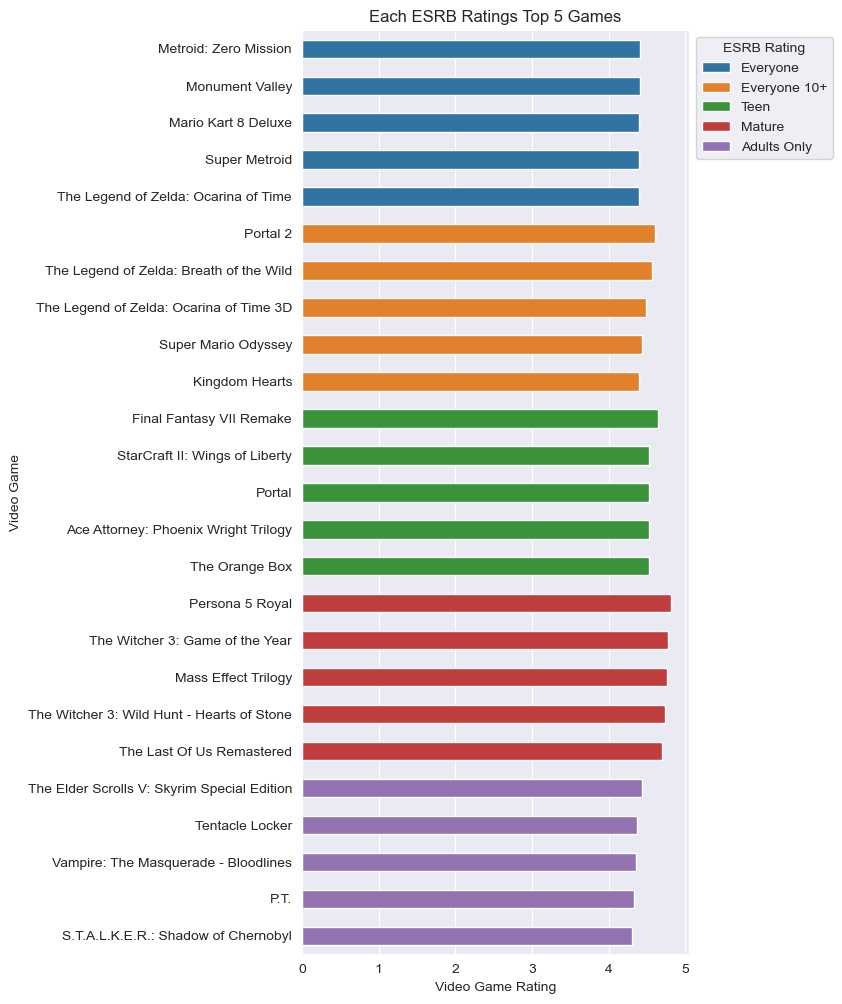

In [109]:
# set figure size and style
plt.figure(figsize=(5, 12))
sns.set_style('darkgrid')
# chart the top 10 games for each esrb rating using a boxplot
ax = sns.barplot(x="rating", y="name", hue='esrb_rating', data=top_esrb, width=0.5, errorbar=None, orient='h', dodge=False)
# set the title and labels for axis and legend
plt.title("Each ESRB Ratings Top 5 Games")
plt.xlabel('Video Game Rating')
plt.ylabel('Video Game')
plt.legend(title='ESRB Rating', bbox_to_anchor=(1, 1), loc='upper left')

# save plot to svg file
plt.savefig('ESRB_top5.svg', format='svg', bbox_inches='tight')

## Conclusions: Games rated mature and everyone are the most successful. I think making a game rated everyone is the best way for a developer to play it safe; they are very consistently average. Mature games have some very high maximum, but also some very low minimum ratings. Games rated everyone have the best median rating, and it makes sense as it's easier to make games for kids than for mature audiences. The differences between the ESRB ratings is minimal enough that any rating should fine for developers.
###

# Question 4: Which games have the most recommendations?
## Now we want to look at the number of recommendations each game has. Create a dataframe with name, suggestions_count, and ratings_count columns. As there are 1842 games in the current dataframe, we'll shrink that number by dropping games that have less than 1000 ratings_count value for better clarity and more accurate ratings.

In [153]:
# create a dataframe with game names and suggestion count
game_rec = df[['name','suggestions_count', 'ratings_count']]
game_rec

,name,suggestions_count,ratings_count
id,,,
10001,Serious Sam Fusion 2017 (beta),541,227
10023,Geneshift,380,139
10028,Space Engineers,479,176
10031,Battlerite,518,393
10035,HITMAN,586,1371
...,...,...,...
9976,Star Conflict,527,114
9979,Dirty Bomb,660,276
998,Battlefield 1,623,1244


### Transpose for better table clarity.

In [154]:
# transpose for clarity
rec_transposed = game_rec.drop(columns=['ratings_count'])
rec_transposed = rec_transposed.transpose()
rec_transposed

id,10001,10023,10028,10031,10035,10037,10039,10040,10049,10050,...,99,9904,9911,9964,9966,9976,9979,998,9981,9997
name,Serious Sam Fusion 2017 (beta),Geneshift,Space Engineers,Battlerite,HITMAN,Europa Universalis IV,Tyranny,Stellaris,Hitman: Codename 47,Thief Gold,...,Snake Pass,Age of Empires II HD,Dungeon Defenders II,Battle Chasers: Nightwar,Dead by Daylight,Star Conflict,Dirty Bomb,Battlefield 1,Total War: WARHAMMER II,Arma 3
suggestions_count,541,380,479,518,586,519,521,402,537,478,...,514,361,604,512,568,527,660,623,325,564


### Sort the values showing top 50 ratings_count values so we know what rows to drop. We want our graph to include about 50 games with the highest rating count, so we'll drop rows where ratings_count is less than 1000. After removing those rows, we can drop the ratings_count column, as it's no longer relevant to this analysis.

In [155]:
# look at the games with top 50 ratings count values
game_rec['ratings_count'].sort_values(ascending = False).head(50)

id
3498     4289
3328     3939
4200     3613
13536    3050
5679     3033
28       2949
58175    2904
4062     2769
5286     2527
13537    2516
3439     2481
278      2440
2454     2424
58134    2325
4286     2295
1030     2239
802      2235
3070     2207
416      2183
3636     2129
12020    2107
4291     2089
4806     2046
3990     2008
11859    1922
22511    1911
4459     1858
3272     1851
430      1829
29177    1829
3192     1785
4166     1771
28568    1763
3387     1759
3254     1735
7689     1727
4161     1726
3612     1715
3287     1708
10213    1694
11973    1693
32       1690
3696     1646
4248     1646
2743     1622
2551     1610
1450     1610
23027    1608
2819     1606
5563     1550
Name: ratings_count, dtype: int64

In [148]:
# drops any rows with a ratings count below 1550
game_rec.drop(game_rec.loc[game_rec['ratings_count']<1550].index, inplace=True)

C:\Users\alexb\AppData\Local\Temp\ipykernel_4368\2788628977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_rec.drop(game_rec.loc[game_rec['ratings_count']<1350].index, inplace=True)


In [149]:
# after removing the rows with low ratings count, we can drop the column
game_rec = game_rec.drop(columns=['ratings_count'])

### Sort the values by descending suggestions count and set the name column as the index for our plot.

In [150]:
# sort the values and set name as index for our plot
game_rec = game_rec.sort_values(by='suggestions_count', ascending=True)
game_rec.set_index('name', inplace=True)
game_rec

,suggestions_count
name,
The Stanley Parable,203
Limbo,222
Journey,297
INSIDE,327
Portal,329
...,...
Wolfenstein: The New Order,710
Dark Souls III,714
Dead Space,717


## Create a horizontal bar chart which displays the amount of suggestions for each game in our dataset.

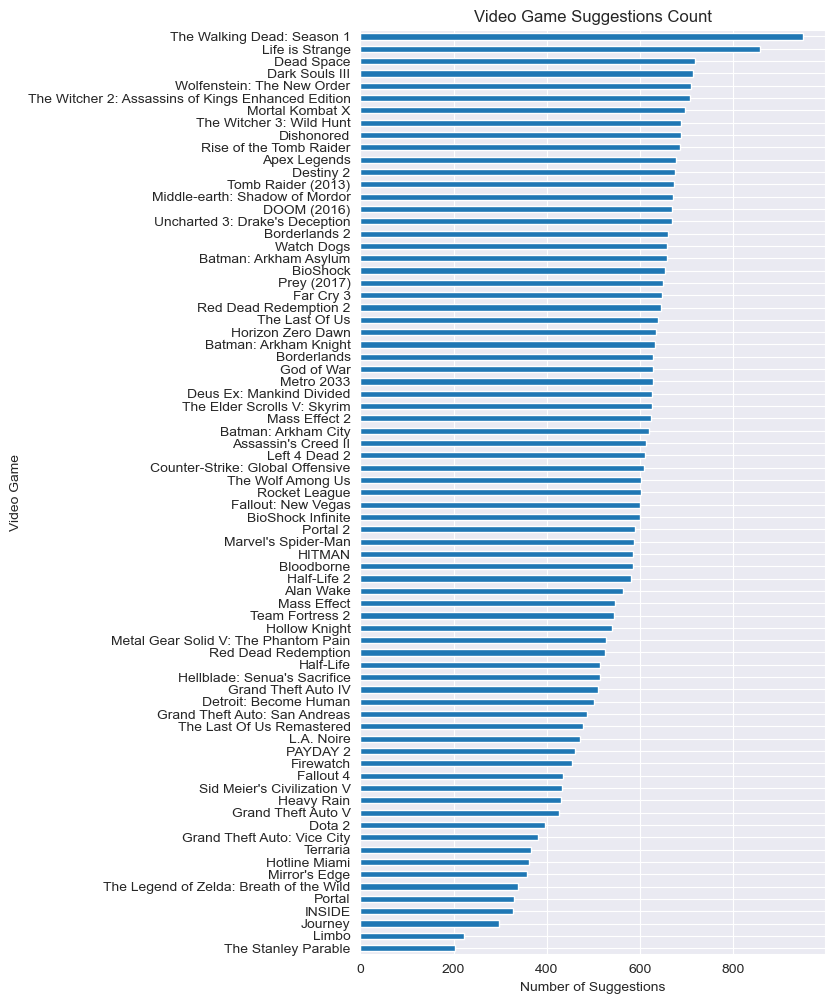

In [151]:
# set figure size and style
sns.set_style('darkgrid')
# create a bar chart to display the amount of suggestions for each game
game_rec.plot(kind='barh', figsize=(6, 12), legend=None)
# set the title and labels for axis and legend
plt.title('Video Game Suggestions Count')
plt.xlabel('Number of Suggestions')
plt.ylabel('Video Game')

# save plot to svg file
plt.savefig('game_recommendation.svg', format='svg', bbox_inches='tight')

## Conclusions: Shooter games had the 3rd highest maximum rating, they had the 4th highest median, and the top most recommended game, Call of Duty, is a shooter game. This reinforces that shooter games are a popular category, but Call of Duty is one of the only shooters at the top of this list. The Walking Dead is an adventure game, and Mass Effect 3 is an action RPG. Life is Strange is an adventure game, and WarFrame is an RPG and a shooter. Taking inspiration from some of these games with multiple genres could be a good idea for developers.
###
# Question 5: How do the ratings from metacritic and RAWG compare for each game?
## To answer this question, create a new dataframe with name, metacritic, rating, and ratings_count columns.  Since we plan on charting the results, we need to shrink our sample size to make the graph clear. We can do this by dropping the null values in metacritic, and by dropping games with a lower ratings_count. This also helps to make the rating values more accurate.

In [237]:
# save a new dataframe with each game and their metacritic and rawg ratings
rating_summary = df[['name', 'metacritic','rating', 'ratings_count']]
rating_summary

,name,metacritic,rating,ratings_count
id,,,,
10001,Serious Sam Fusion 2017 (beta),NaN,3.07,227
10023,Geneshift,NaN,2.20,139
10028,Space Engineers,68.0,3.54,176
10031,Battlerite,NaN,3.24,393
10035,HITMAN,83.0,3.92,1371
...,...,...,...,...
9976,Star Conflict,75.0,2.83,114
9979,Dirty Bomb,63.0,2.79,276
998,Battlefield 1,88.0,3.80,1244


### Remove null values from the dataset.

In [238]:
# check null count for metacritic column
rating_summary['metacritic'].isna().sum()

429

In [239]:
# since the purpose of this data set is to compare the reviews 
# of metacritic and rawg, we can drop any null values
rating_summary = rating_summary.dropna(subset=['metacritic'])
rating_summary

,name,metacritic,rating,ratings_count
id,,,,
10028,Space Engineers,68.0,3.54,176
10035,HITMAN,83.0,3.92,1371
10037,Europa Universalis IV,87.0,4.26,240
10039,Tyranny,80.0,4.07,298
10040,Stellaris,78.0,4.25,421
...,...,...,...,...
9976,Star Conflict,75.0,2.83,114
9979,Dirty Bomb,63.0,2.79,276
998,Battlefield 1,88.0,3.80,1244


### Because RAWG rates 1-5, and Metacritic rates 1-100, we need to scale the RAWG ratings to match the Metacritic ratings for comparison. To do this, divide the rating by 5 (the max rate) and then multiply by 100 to get the percentage value out of 100, and save to a new column.

In [240]:
# scale the rawg ratings in order to compare the ratings
max_rate = 5
rating_summary['rawg'] = (df['rating'] / max_rate) * 100
rating_summary = rating_summary.round(1)
rating_summary

C:\Users\alexb\AppData\Local\Temp\ipykernel_4368\1790920771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_summary['rawg'] = (df['rating'] / max_rate) * 100


,name,metacritic,rating,ratings_count,rawg
id,,,,,
10028,Space Engineers,68.0,3.5,176,70.8
10035,HITMAN,83.0,3.9,1371,78.4
10037,Europa Universalis IV,87.0,4.3,240,85.2
10039,Tyranny,80.0,4.1,298,81.4
10040,Stellaris,78.0,4.2,421,85.0
...,...,...,...,...,...
9976,Star Conflict,75.0,2.8,114,56.6
9979,Dirty Bomb,63.0,2.8,276,55.8
998,Battlefield 1,88.0,3.8,1244,76.0


### Right now, we have 1413 games. We only want to plot the 150 games with highest rating counts. Display the top 150 highest values for ratings_count so we can keep these games and drop the rest.

In [241]:
# check the value counts for ratings_count so we know which values to drop
rating_summary['ratings_count'].sort_values(ascending = False).head(50)

id
3498     4289
3328     3939
4200     3613
13536    3050
5679     3033
28       2949
58175    2904
4062     2769
5286     2527
13537    2516
3439     2481
278      2440
2454     2424
58134    2325
4286     2295
1030     2239
802      2235
3070     2207
416      2183
3636     2129
12020    2107
4291     2089
4806     2046
3990     2008
11859    1922
22511    1911
4459     1858
3272     1851
430      1829
29177    1829
3192     1785
4166     1771
28568    1763
3387     1759
3254     1735
7689     1727
4161     1726
3612     1715
3287     1708
10213    1694
11973    1693
32       1690
4248     1646
3696     1646
2743     1622
1450     1610
2551     1610
23027    1608
2819     1606
5563     1550
Name: ratings_count, dtype: int64

### The 150th ratings_count value is around 1000, so drop any rows where the ratings_count is less than this. After removing those rows, the ratings_count column is no longer relevant to our analysis. Drop that column, as well as the original rating column that showed RAWG ratings on a scale from 1-5.

In [242]:
# drop rows that have less than 1000 ratings
rating_summary.drop(rating_summary.loc[rating_summary['ratings_count']<1550].index, inplace=True)
# drop rating and ratings_count columns because we don't want them to apear in our chart
rating_summary = rating_summary.drop(columns=['rating', 'ratings_count'])

### Now we'll save 2 datasets, with rating_summary sorted in order of ascending metacritic ratings, and rawg_sorted in order of rawg ratings. Set the name column as the index for our plot.

In [243]:
# sort the values by descending metacritic ratings
rating_summary = rating_summary.sort_values(by='metacritic', ascending=True)

In [199]:
# set name column as the index
rating_summary.set_index('name', inplace=True)
rating_summary

,metacritic,rawg
name,,
Detroit: Become Human,79.0,85.2
Heavy Rain,80.0,81.4
Batman: Arkham Knight,81.0,84.4
Wolfenstein: The New Order,81.0,84.2
Firewatch,81.0,86.2
Counter-Strike: Global Offensive,81.0,71.4
Destiny 2,82.0,72.6
Life is Strange,83.0,82.2
Fallout: New Vegas,84.0,88.0


In [200]:
# sort the values by descending rawg ratings
rawg_sorted = rating_summary.sort_values(by='rawg', ascending=True)
rawg_sorted

,metacritic,rawg
name,,
Dota 2,90.0,62.2
Counter-Strike: Global Offensive,81.0,71.4
Destiny 2,82.0,72.6
Team Fortress 2,92.0,73.6
Fallout 4,84.0,75.2
Middle-earth: Shadow of Mordor,85.0,77.8
Rise of the Tomb Raider,86.0,80.2
Rocket League,86.0,80.2
Borderlands 2,89.0,81.0


In [201]:
# transpose for clarity
rating_summary_transposed = rating_summary.transpose()
rating_summary_transposed

name,Detroit: Become Human,Heavy Rain,Batman: Arkham Knight,Wolfenstein: The New Order,Firewatch,Counter-Strike: Global Offensive,Destiny 2,Life is Strange,Fallout: New Vegas,Fallout 4,...,BioShock Infinite,Portal 2,The Last Of Us,The Last Of Us Remastered,Grand Theft Auto IV,BioShock,Red Dead Redemption 2,Half-Life 2,The Legend of Zelda: Breath of the Wild,Grand Theft Auto V
metacritic,79.0,80.0,81.0,81.0,81.0,81.0,82.0,83.0,84.0,84.0,...,94.0,95.0,95.0,95.0,95.0,96.0,96.0,96.0,97.0,97.0
rawg,85.2,81.4,84.4,84.2,86.2,71.4,72.6,82.2,88.0,75.2,...,87.8,92.2,91.6,94.0,84.8,87.8,91.4,90.0,91.2,89.6


## Plot the comparison of rawg and metacritic ratings

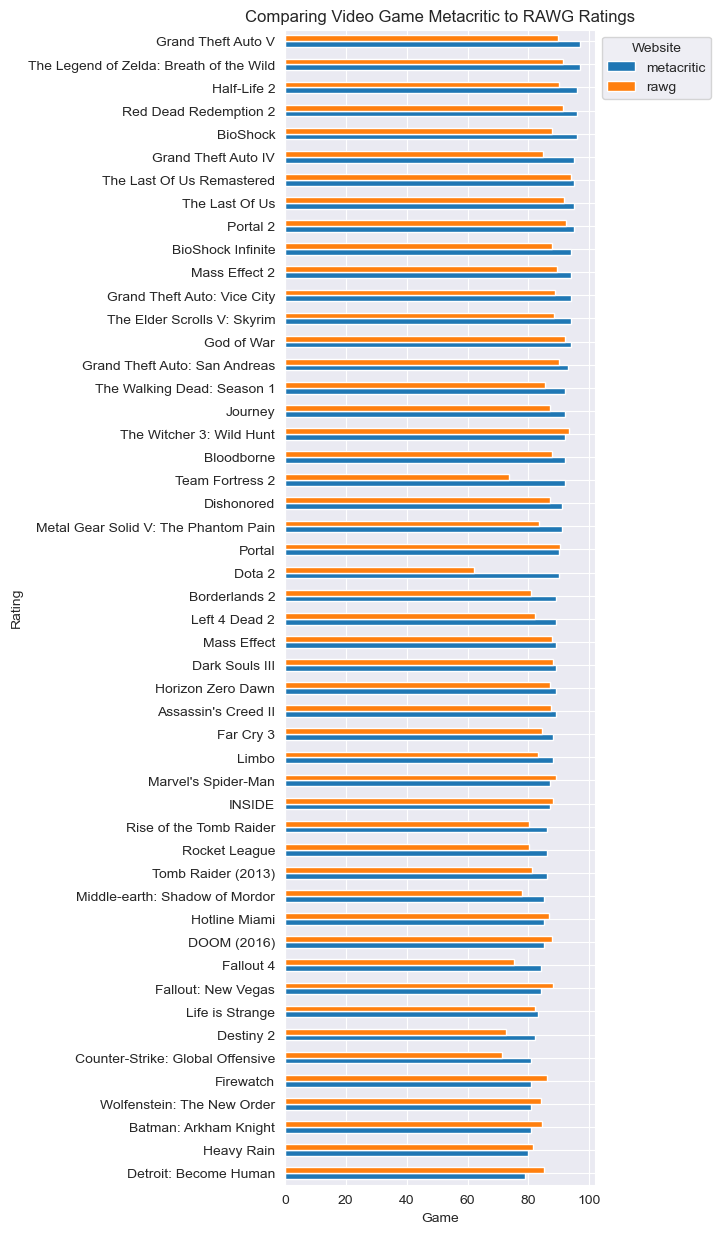

In [204]:
# create a grouped bar chart to display the ratings from metacritic and rawg side by side
rating_summary.plot(kind='barh', figsize=(4, 15))
# set the title and labels for axis and legend
plt.title('Comparing Video Game Metacritic to RAWG Ratings')
plt.xlabel('Game')
plt.ylabel('Rating')
plt.legend(title='Website', bbox_to_anchor=(1, 1), loc='upper left')

# save plot to svg file
plt.savefig('sort_ratings_metacritic.svg', format='svg', bbox_inches='tight')

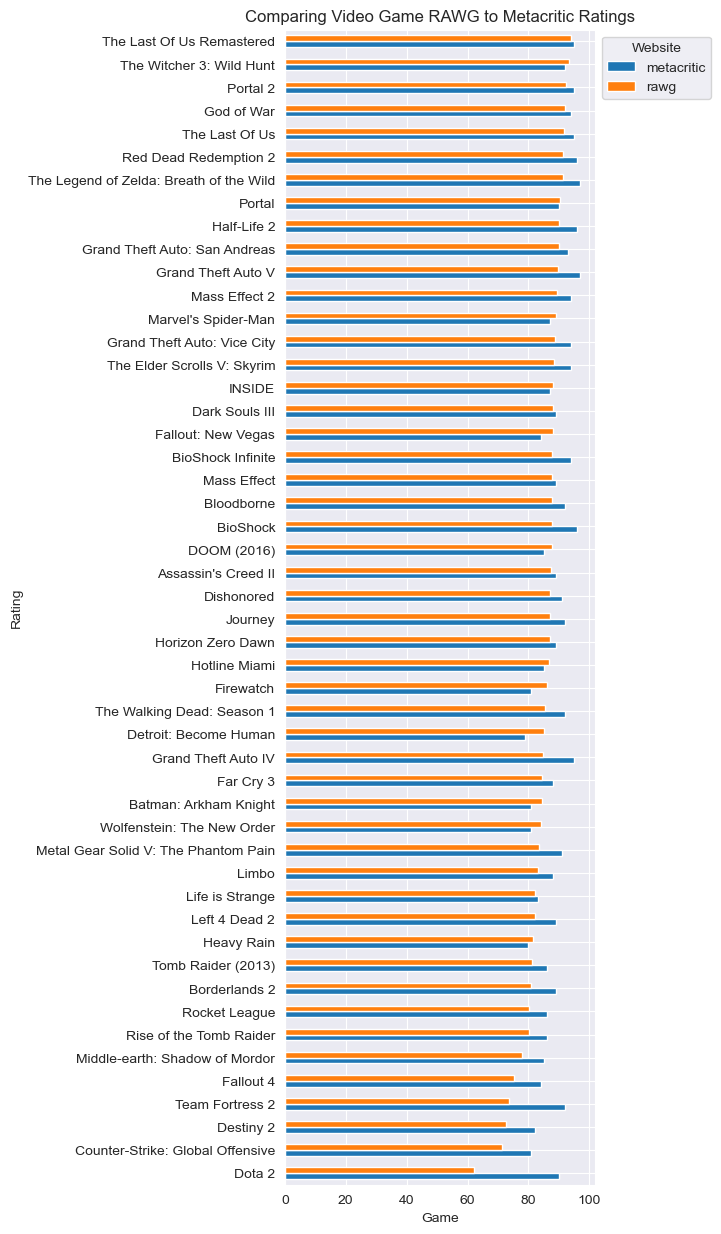

In [205]:
# create a grouped bar chart to display the ratings from metacritic and rawg side by side
rawg_sorted.plot(kind='barh', figsize=(4, 15))
# set the title and labels for axis and legend
plt.title('Comparing Video Game RAWG to Metacritic Ratings')
plt.xlabel('Game')
plt.ylabel('Rating')
plt.legend(title='Website', bbox_to_anchor=(1, 1), loc='upper left')

# save plot to svg file
plt.savefig('sort_ratings_rawg.svg', format='svg', bbox_inches='tight')

## Conclusions: Some of these ratings are very different. The bottom lowest rated RAWG game is near the top of the Metacritic list, with nearly a 30 point difference. This goes to show that developers and game sellers shouldn't always trust one single source with ratings, but look at different sources to get the most accurate idea of what is popular.
##
# Question 6: What is the completion status of each game?
## To answer this question, we'll create a DataFrame with name, rating, ratings_count, added_status_beaten, and added_status_dropped columns. Because we have 1842 rows, we'll shrink the dataset by taking the sum of the beaten + dropped status and keeping the rows that have the top 150 highest values for our plot.

In [228]:
# create new play_status dataframe
play_status = df[['name','rating','added_status_beaten','added_status_dropped']]
play_status

,name,rating,added_status_beaten,added_status_dropped
id,,,,
10001,Serious Sam Fusion 2017 (beta),3.07,41,79
10023,Geneshift,2.20,2,26
10028,Space Engineers,3.54,26,119
10031,Battlerite,3.24,41,249
10035,HITMAN,3.92,656,440
...,...,...,...,...
9976,Star Conflict,2.83,6,57
9979,Dirty Bomb,2.79,36,176
998,Battlefield 1,3.80,735,441


### Rename columns for better clarity.

In [229]:
# rename columns
play_status = play_status.rename(columns={'added_status_beaten': "beaten", "added_status_dropped": "dropped"})
play_status

,name,rating,beaten,dropped
id,,,,
10001,Serious Sam Fusion 2017 (beta),3.07,41,79
10023,Geneshift,2.20,2,26
10028,Space Engineers,3.54,26,119
10031,Battlerite,3.24,41,249
10035,HITMAN,3.92,656,440
...,...,...,...,...
9976,Star Conflict,2.83,6,57
9979,Dirty Bomb,2.79,36,176
998,Battlefield 1,3.80,735,441


### Calculate the sum of beaten and dropped values for each row. Sort the summed values in descending order, and keep the top 150 rows in our dataset.

In [230]:
# get the sum of beaten and dropped values and store in new sum column
play_status['sum'] = play_status['beaten'] + play_status['dropped']
# sort sum in descending order
play_status = play_status.sort_values(by='sum', ascending=False)
play_status

,name,rating,beaten,dropped,sum
id,,,,,
3498,Grand Theft Auto V,4.48,3533,641,4174
4200,Portal 2,4.61,3414,324,3738
13536,Portal,4.52,3088,215,3303
3328,The Witcher 3: Wild Hunt,4.67,2759,485,3244
4062,BioShock Infinite,4.39,2820,297,3117
...,...,...,...,...,...
54122,Ultima IV: Quest of the Avatar,2.27,10,23,33
3238,Fortified,2.09,4,29,33
22853,Worlds of Ultima: The Savage Empire,2.04,5,23,28


In [231]:
# keep only the top 150 games with greatest beaten/dropped sum in our dataset
play_status = play_status.head(50)
play_status

,name,rating,beaten,dropped,sum
id,,,,,
3498,Grand Theft Auto V,4.48,3533,641,4174
4200,Portal 2,4.61,3414,324,3738
13536,Portal,4.52,3088,215,3303
3328,The Witcher 3: Wild Hunt,4.67,2759,485,3244
4062,BioShock Infinite,4.39,2820,297,3117
5679,The Elder Scrolls V: Skyrim,4.42,2313,801,3114
5286,Tomb Raider (2013),4.06,2599,305,2904
13537,Half-Life 2,4.50,2317,303,2620
4286,BioShock,4.39,2126,443,2569


## Now we'll get the percentage values for beaten and dropped status for one of our plots. Sort by ascending beaten percent and create a stacked bar chart which shows the ratio of beaten/dropped percentages for each game.

In [232]:
# calculate the beaten/dropped percentage in each row
play_status['beat_percent'] = (play_status['beaten'] / play_status['sum']) * 100
play_status['drop_percent'] = (play_status['dropped'] / play_status['sum']) * 100

# sort the dataframe by beaten status in ascending order
play_status = play_status.sort_values(by='beat_percent', ascending=True)
play_status

C:\Users\alexb\AppData\Local\Temp\ipykernel_4368\1279141234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  play_status['beat_percent'] = (play_status['beaten'] / play_status['sum']) * 100
C:\Users\alexb\AppData\Local\Temp\ipykernel_4368\1279141234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  play_status['drop_percent'] = (play_status['dropped'] / play_status['sum']) * 100


,name,rating,beaten,dropped,sum,beat_percent,drop_percent
id,,,,,,,
11859,Team Fortress 2,3.68,513,1092,1605,31.962617,68.037383
4291,Counter-Strike: Global Offensive,3.57,544,1056,1600,34.000000,66.000000
3070,Fallout 4,3.76,1378,815,2193,62.836297,37.163703
802,Borderlands 2,4.05,1495,788,2283,65.484012,34.515988
3192,Metal Gear Solid V: The Phantom Pain,4.17,1092,570,1662,65.703971,34.296029
3687,Watch Dogs,3.51,1162,486,1648,70.509709,29.490291
12020,Left 4 Dead 2,4.10,1542,634,2176,70.863971,29.136029
4459,Grand Theft Auto IV,4.24,1659,625,2284,72.635727,27.364273
5679,The Elder Scrolls V: Skyrim,4.42,2313,801,3114,74.277457,25.722543


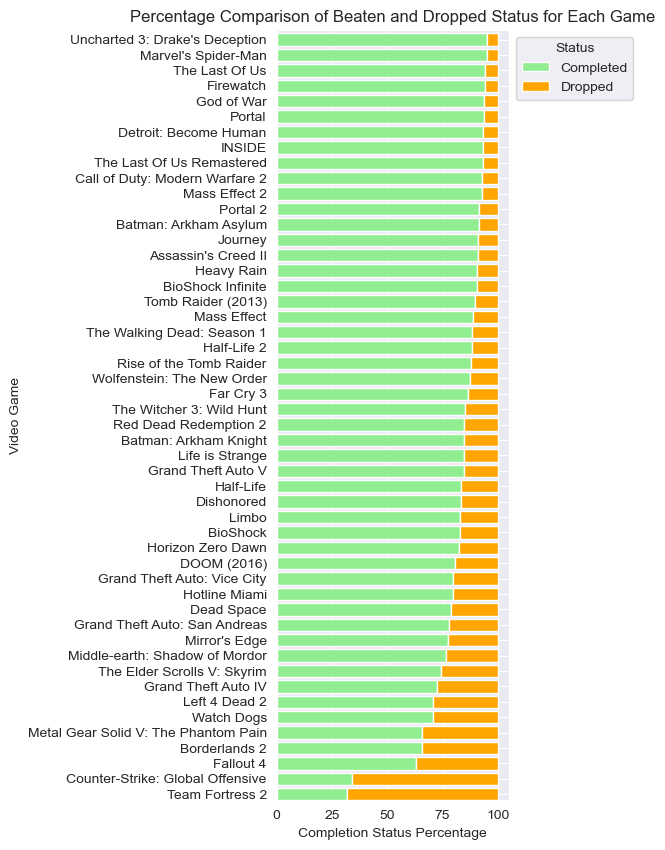

In [233]:
# set figure size and style
plt.figure(figsize=(3, 10))
sns.set_style('darkgrid')

# create a stacked horizontal bar chart that plots the percentage amounts of beaten/dropped status
plt.barh(play_status['name'], play_status['beat_percent'], color='lightgreen', label='Completed')
plt.barh(play_status['name'], play_status['drop_percent'], color='orange', label='Dropped', left=play_status['beat_percent'])

# set title and labels for axis and legend
plt.xlabel('Completion Status Percentage')
plt.ylabel('Video Game')
plt.title('Percentage Comparison of Beaten and Dropped Status for Each Game')
plt.legend(title='Status', bbox_to_anchor=(1, 1), loc='upper left')
# adjust y-axis limits to remove blank space at top and bottom of plot
plt.ylim(-0.4, len(play_status['name']) - 0.4)

# save plot to svg file
plt.savefig('completion_percentage.svg', format='svg', bbox_inches='tight')

## Create inverted and stacked bar charts displaying the amount of players who beat/dropped each game

In [234]:
# sort the dataframe by beaten status in ascending order
play_status = play_status.sort_values(by='beaten', ascending=True)

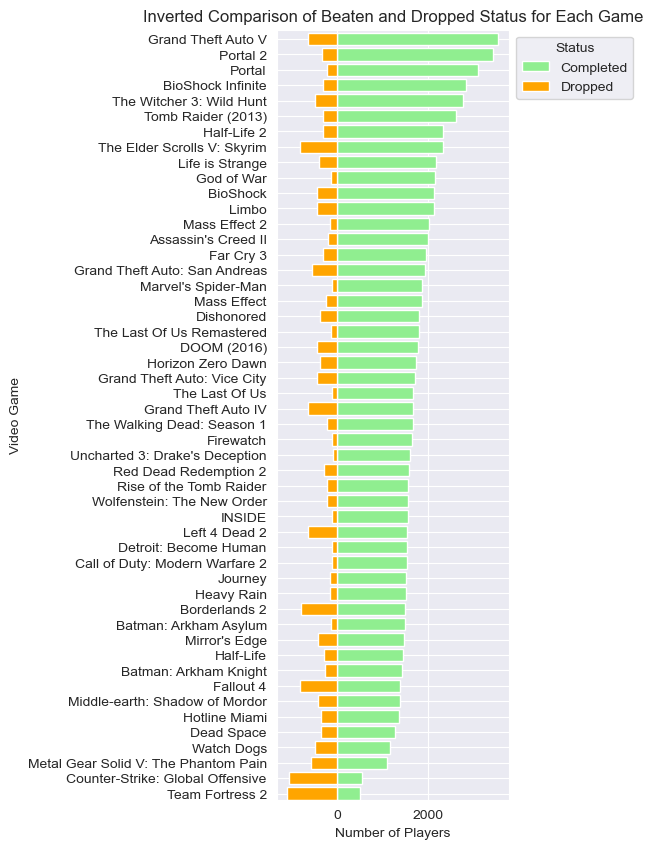

In [235]:
# set figure size and style
plt.figure(figsize=(3, 10))
sns.set_style('darkgrid')

# create a horizontal bar chart that plots the game versus amount of people who have beaten/dropped the game
plt.barh(play_status['name'], play_status['beaten'], color='lightgreen', label='Completed')
plt.barh(play_status['name'], -play_status['dropped'], color='orange', label='Dropped')  # Using negative values for dropped to plot in the opposite direction

# set title and labels for axis and legend
plt.xlabel('Number of Players')
plt.ylabel('Video Game')
plt.title('Inverted Comparison of Beaten and Dropped Status for Each Game')
plt.legend(title='Status', bbox_to_anchor=(1,1), loc='upper left')
# adjust y-axis limits to remove blank space at top and bottom of plot
plt.ylim(-0.4, len(play_status['name']) - 0.4)

# save plot to svg file
plt.savefig('completion_inverted.svg', format='svg', bbox_inches='tight')

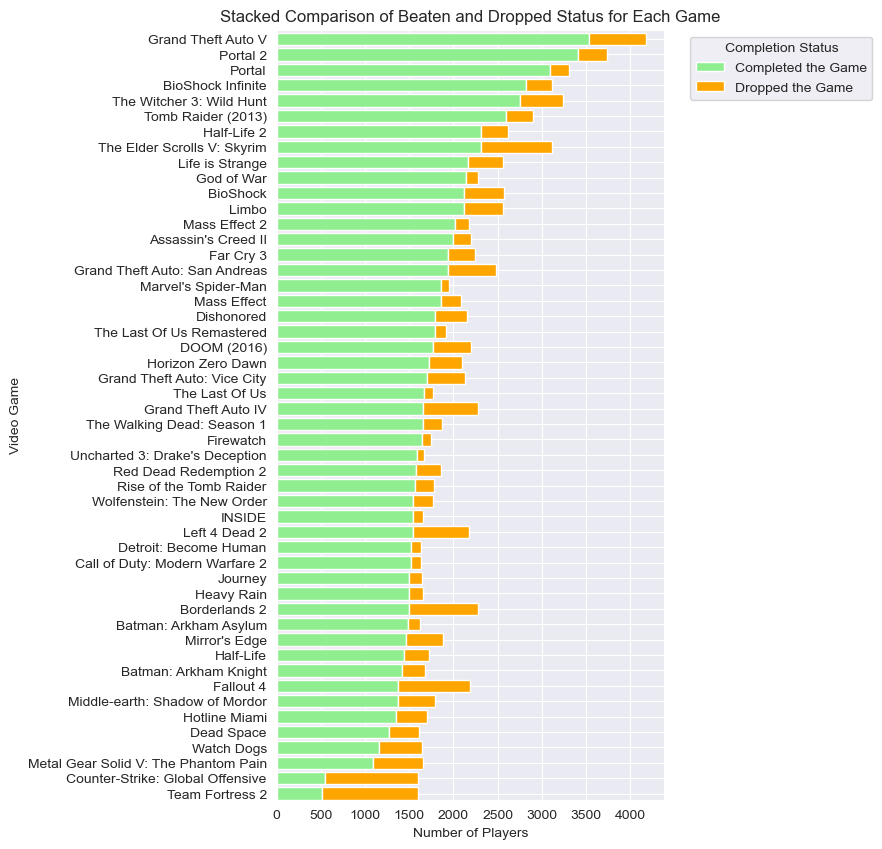

In [215]:
# set figure size and style
plt.figure(figsize=(5, 10))
sns.set_style('darkgrid')

# create a stacked horizontal bar chart that plots the game versus amount of people who have beaten/dropped the game
plt.barh(play_status['name'], play_status['beaten'], color='lightgreen', label='Completed the Game')
plt.barh(play_status['name'], play_status['dropped'], color='orange', label='Dropped the Game', left=play_status['beaten'])

# set title and labels for axis and legend
plt.xlabel('Number of Players')
plt.ylabel('Video Game')
plt.title('Stacked Comparison of Beaten and Dropped Status for Each Game')
plt.legend(title='Completion Status', bbox_to_anchor=(1, 1), loc='upper left')
# adjust y-axis limits to remove blank space at top and bottom of plot
plt.ylim(-0.4, len(play_status['name']) - 0.4)

# save plot to svg file
plt.savefig('completion_stacked.svg', format='svg', bbox_inches='tight')

## Conclusions: It's interesting that Dota 2 has the lowest completion rate, with nearly 80% of players having dropped the game, and it's also the game with the lowest rating on RAWG. There are only a few games that have been dropped more than they've been completed, so these games could provide insight into what game developers should avoid in creating new games. They could take inspiration from Grand Theft Auto V, which has the highest number of completions, or Uncharted 2, which has the highest completion percentage. Uncharted 3 has the third highest completion rate, and since 2 games in the Uncharted series top this list, those developers are probably doing something right. 